In [1]:
import pandas as pd
import numpy as np
from copy import copy, deepcopy
import random
import datetime
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
import sklearn as sk
from tslearn.clustering import silhouette_score

# Import data
seed = 44
np.random.seed(seed)
rnd = np.random.RandomState(seed=seed)
random.seed(seed)

/usr/local/lib/python3.8/dist-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
print("Reading file...")
all_df = pd.read_csv('./data.csv', low_memory=False)
print("Done reading!")
all_df['time'] = pd.to_datetime(all_df['timestamp'] * 1000000000)
all_df = all_df.rename({'time': 'ds', 'percentOfMaxPrice': 'y'}, axis='columns')
dfs = [v for k, v in all_df.groupby('itadPlain')]
print("Everything done!")


Reading file...
Done reading!
Everything done!


In [3]:

onlyTrend = []
for df in dfs:
    onlyTrend.append(df['y'])

trends = np.array(onlyTrend, dtype=object)

In [4]:
# Convert it so that it's compatible with numpy
for i in range(0, len(trends)):
    trends[i] = trends[i].to_numpy()

In [5]:
# Train Splitting
X_train = trends
np.random.shuffle(X_train)
X_train = X_train[:2000]

In [6]:
# this is the data we're working with.
X_train[0:5]

array([array([1.        , 0.79927273, 0.79927273, ..., 0.67054545, 0.67054545,
              0.67054545])                                                    ,
       array([0.89856145, 0.73983752, 0.73983752, ..., 0.2791931 , 0.2791931 ,
              0.2791931 ])                                                    ,
       array([1.        , 0.71779809, 0.21409922, ..., 0.47845953, 0.47845953,
              0.47845953])                                                    ,
       array([-9.57, -6.49, -6.49, ..., -0.  , -0.  , -0.  ]),
       array([1.       , 0.8373583, 0.8373583, ..., 0.8373583, 0.8373583,
              0.8373583])                                                ],
      dtype=object)

In [7]:
def create_training_data(sz=80):
    # Normalize around 0
    t_data = TimeSeriesResampler(sz=sz).fit_transform(trends)[:2000]
    t_data = TimeSeriesScalerMeanVariance().fit_transform(t_data)
    return t_data

Soft-DTW k-means
452.864 --> 187.024 --> 172.632 --> 170.969 --> 169.776 --> 169.119 --> 168.174 --> 167.941 --> 167.947 --> 167.893 --> 167.885 --> 167.856 --> 167.852 --> 167.827 --> 167.827 --> 167.819 --> 167.810 --> 167.807 --> 167.803 --> 167.794 --> 167.793 --> 167.793 --> 167.792 --> 167.792 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 167.791 --> 


IndexError: index 4 is out of bounds for axis 0 with size 4

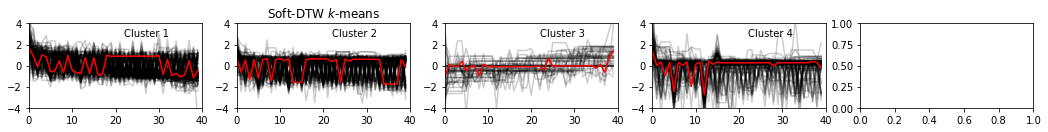

In [8]:
a_data = create_training_data(sz=40)
sdtw_data = a_data[:500]
test_data = a_data[500:1000]
print("Soft-DTW k-means")
sdtw_km_lo_cluster = TimeSeriesKMeans(n_clusters=4, n_jobs=-1,metric="softdtw", metric_params={"gamma": .02},verbose=True,random_state=seed)

y_pred = sdtw_km_lo_cluster.fit_predict(sdtw_data)

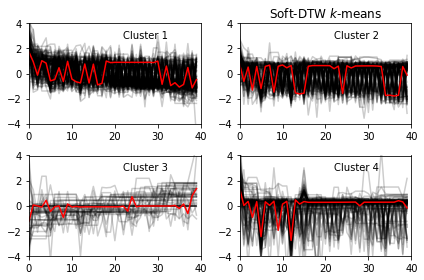

In [11]:
# plt.figure(figsize=(18, 9))
for yi in range(4):
    plt.subplot(2, 2, 1 + yi)
    for xx in sdtw_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km_lo_cluster.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 40)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()




In [12]:
labels = sdtw_km_lo_cluster.labels_
print("trained silhouette lo", silhouette_score(sdtw_data, labels, random_state=seed))
print("new data lo", silhouette_score(test_data, labels, random_state=seed))


trained silhouette lo 0.1462822075196326
new data lo -0.01675434617862049


In [14]:
# Soft-DTW-k-means

sdtw_data = create_training_data(sz=40)[:500]
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=24, n_jobs=-1,metric="softdtw", metric_params={"gamma": .02},verbose=True,random_state=seed)


y_pred = sdtw_km.fit_predict(sdtw_data)

Soft-DTW k-means
119.781 --> 66.781 --> 58.363 --> 57.173 --> 56.664 --> 56.417 --> 56.257 --> 56.234 --> 56.171 --> 56.138 --> 56.146 --> 56.132 --> 56.132 --> 56.130 --> 56.130 --> 56.128 --> 56.128 --> 56.127 --> 56.128 --> 56.127 --> 56.128 --> 56.128 --> 56.128 --> 56.128 --> 56.128 --> 56.128 --> 56.128 --> 56.128 --> 56.128 --> 56.129 --> 56.125 --> 56.127 --> 56.122 --> 56.124 --> 56.119 --> 56.122 --> 56.118 --> 56.119 --> 56.118 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 56.119 --> 


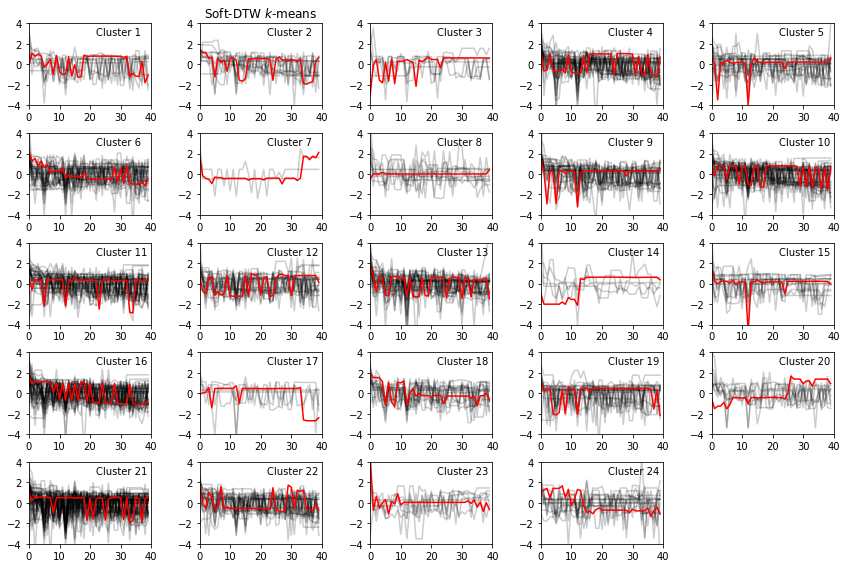

In [22]:
plt.figure(figsize=(12, 8))
for yi in range(24):
    plt.subplot(5, 5, 1 + yi)
    for xx in sdtw_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 40)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()



In [16]:
test_data = create_training_data(sz=40)[500:1000,]

In [17]:
test_data

array([[[ 2.03933264],
        [ 2.03933264],
        [ 1.48177919],
        ...,
        [-0.5844483 ],
        [-0.91164471],
        [-0.93428575]],

       [[ 1.66286548],
        [ 1.4826535 ],
        [ 1.4826535 ],
        ...,
        [-1.1552836 ],
        [-1.14292283],
        [-1.07458408]],

       [[ 1.8420466 ],
        [ 1.0478922 ],
        [ 1.23160825],
        ...,
        [-0.12048346],
        [-0.06952731],
        [-1.1558654 ]],

       ...,

       [[-1.55353802],
        [-1.55353802],
        [-1.55353802],
        ...,
        [ 0.74863352],
        [ 0.74863352],
        [ 0.74863352]],

       [[ 1.96499109],
        [ 0.51365271],
        [ 0.51365271],
        ...,
        [-0.00841146],
        [-0.00841146],
        [-0.00841146]],

       [[ 1.3700222 ],
        [ 0.56018153],
        [ 0.56018153],
        ...,
        [-2.29773445],
        [ 0.20514269],
        [ 0.20514269]]])

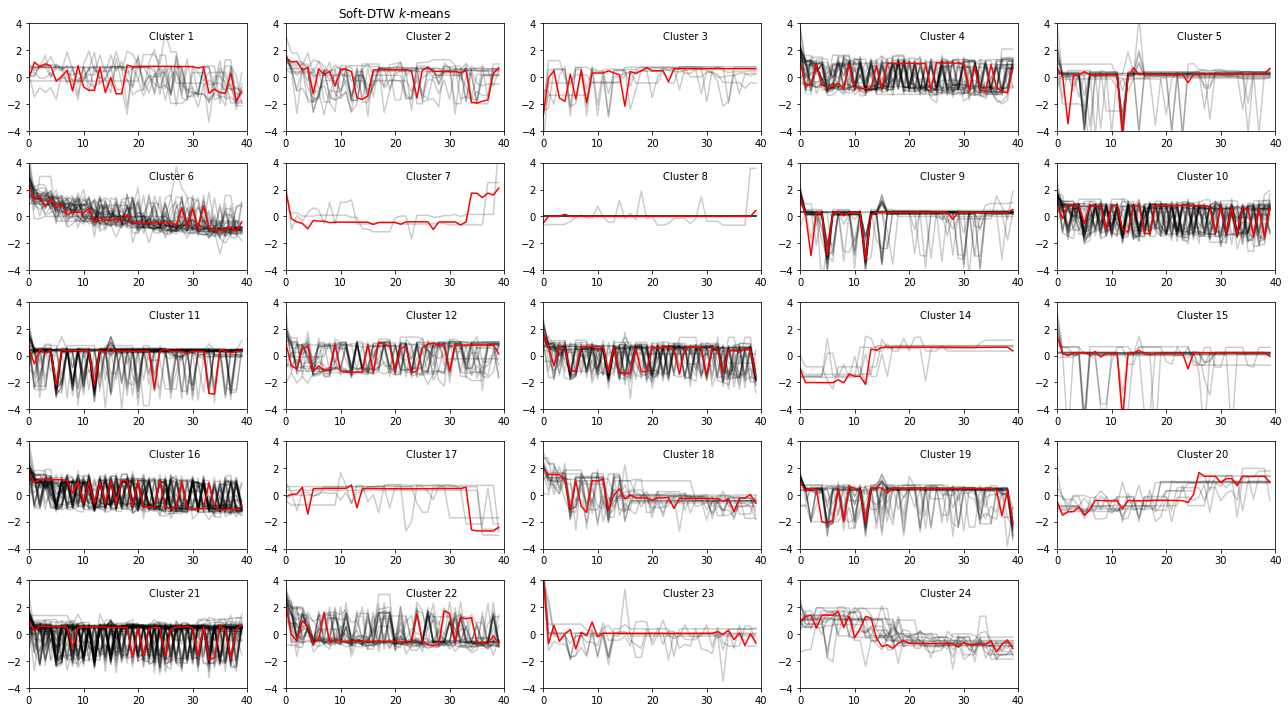

In [18]:



# Calculate silhouette coeff

y_pred = sdtw_km.predict(test_data)

plt.figure(figsize=(18, 10))
for yi in range(24):
    plt.subplot(5, 5, 1 + yi)
    for xx in test_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 40)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()





In [19]:
labels = sdtw_km.labels_
print("trained silhouette", silhouette_score(sdtw_data, labels, random_state=seed))
print("new data", silhouette_score(test_data, labels, random_state=seed))


trained silhouette 0.11135690265973477
new data -0.17235939303792405


The trained value is at 0.102, and on new data, the model regresses to a silhouette score of -0.11 (negative is bad)
https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

Let's try some other algos